## Using context managers
#### The number of cats
You are working on a natural language processing project to determine what makes great writers so great. Your current hypothesis is that great writers talk about cats a lot. To prove it, you want to count the number of times the word "cat" appears in "Alice's Adventures in Wonderland" by Lewis Carroll. You have already downloaded a text file, alice.txt, with the entire contents of this great book.

In [7]:
# Open "alice.txt" and assign the file to "file"
with open('alice.txt') as file:
  text = file.read()

n = 0
for word in text.split():
  if word.lower() in ['cat', 'cats']:
    n += 1

print('Lewis Carroll uses the word "cat" {} times'.format(n))


FileNotFoundError: [Errno 2] No such file or directory: 'alice.txt'

Lewis Carroll uses the word "cat" 24 times

Cool cat counting! By opening the file using the with open() statement, you were able to read in the text of the file. More importantly, when you were done reading the text, the context manager closed the file for you.

#### The speed of cats
You're working on a new web service that processes Instagram feeds to identify which pictures contain cats (don't ask why -- it's the internet). The code that processes the data is slower than you would like it to be, so you are working on tuning it up to run faster. Given an image, image, you have two functions that can process it:

process_with_numpy(image)
process_with_pytorch(image)
Your colleague wrote a context manager, timer(), that will print out how long the code inside the context block takes to run. She is suggesting you use it to see which of the two options is faster. Time each function to determine which one to use in your web service.

In [8]:
image = get_image_from_instagram()

# Time how long process_with_numpy(image) takes to run
with timer():
  print('Numpy version')
  process_with_numpy(image)

# Time how long process_with_pytorch(image) takes to run
with timer():
  print('Pytorch version')
  process_with_pytorch(image)
  




NameError: name 'get_image_from_instagram' is not defined

Numpy version
Processing..........done!
Elapsed: 3.78 seconds
Pytorch version
Processing..........done!
Elapsed: 0.34 seconds

Terrific timing! Now that you know the pytorch version is faster, you can use it in your web service to ensure your users get the rapid response time they expect.

You may have noticed there was no as <variable name> at the end of the with statement in timer() context manager. That is because timer() is a context manager that does not return a value, so the as <variable name> at the end of the with statement isn't necessary. In the next lesson, you'll learn how to write your own context managers like timer().

In [9]:
# Add a decorator that will make timer() a context manager
@contextlib.contextmanager
def timer():
  """Time the execution of a context block.

  Yields:
    None
  """
  start = time.time()
  # Send control back to the context block
  yield 
  end = time.time()
  print('Elapsed: {:.2f}s'.format(end - start))

with timer():
  print('This should take approximately 0.25 seconds')
  time.sleep(0.25)


NameError: name 'contextlib' is not defined

<script.py> output:
    This should take approximately 0.25 seconds
    Elapsed: 0.25s

You're managing context like a boss! And your colleague can now use your timer() context manager to figure out which of their functions is running too slow. Notice that the three elements of a context manager are all here: a function definition, a yield statement, and the @contextlib.contextmanager decorator. It's also worth noticing that timer() is a context manager that does not return an explicit value, so yield is written by itself without specifying anything to return.

#### A read-only open() context manager
You have a bunch of data files for your next deep learning project that took you months to collect and clean. It would be terrible if you accidentally overwrote one of those files when trying to read it in for training, so you decide to create a read-only version of the open() context manager to use in your project.

The regular open() context manager:

takes a filename and a mode ('r' for read, 'w' for write, or 'a' for append)
opens the file for reading, writing, or appending
yields control back to the context, along with a reference to the file
waits for the context to finish
and then closes the file before exiting
Your context manager will do the same thing, except it will only take the filename as an argument and it will only open the file for reading.

In [10]:
@contextlib.contextmanager
def open_read_only(filename):
  """Open a file in read-only mode.

  Args:
    filename (str): The location of the file to read

  Yields:
    file object
  """
  read_only_file = open(filename, mode='r')
  # Yield read_only_file so it can be assigned to my_file
  yield read_only_file
  # Close read_only_file
  read_only_file.close()

with open_read_only('my_file.txt') as my_file:
  print(my_file.read())

NameError: name 'contextlib' is not defined

<script.py> output:
    Congratulations! You wrote a context manager that acts like "open()" but operates in read-only mode!

That is a radical read-only context manager! Now you can relax, knowing that every time you use with open_read_only() your files are safe from being accidentally overwritten. This function is an example of a context manager that _does_ return a value, so we write yield read_only_file instead of just yield. Then the read_only_file object gets assigned to my_file in the with statement so that whoever is using your context can call its .read() method in the context block.

## Advanced topics

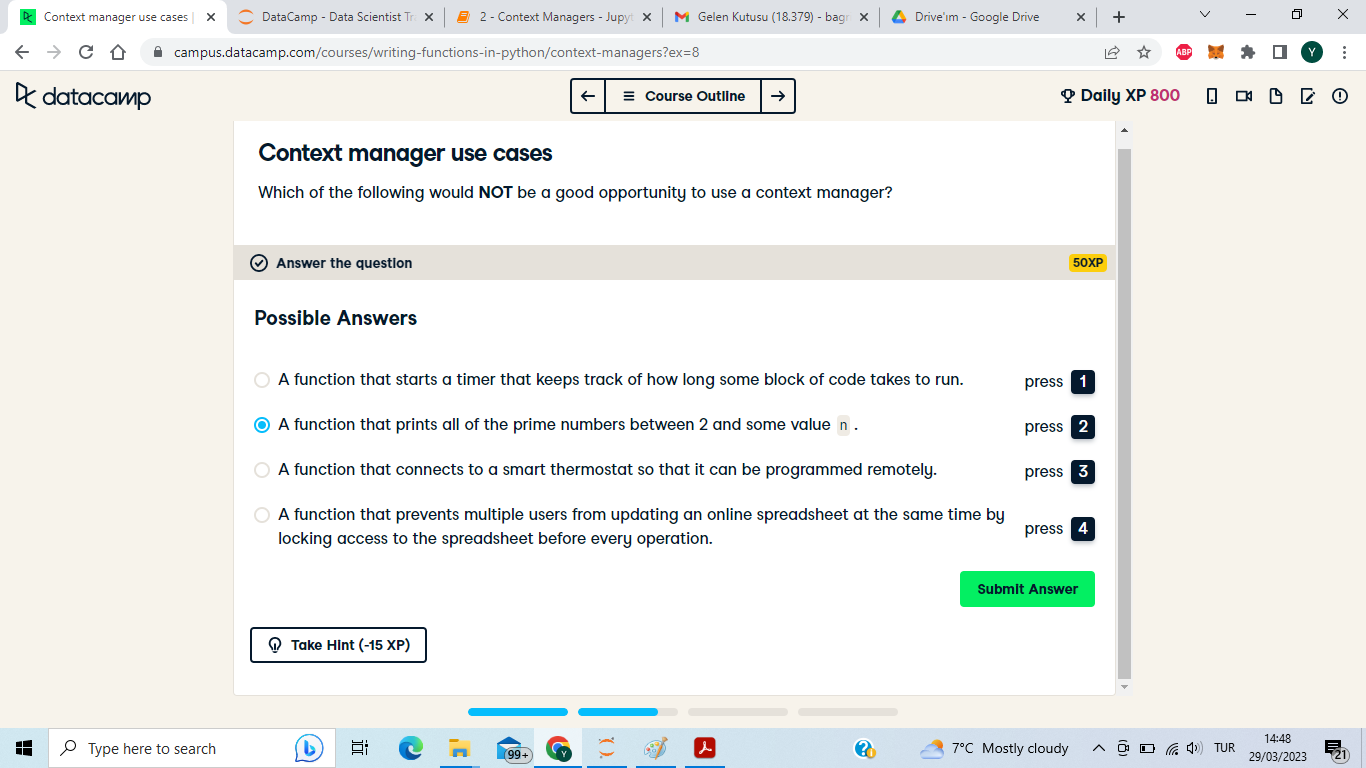

Correct! While you might be able to do this with a context manager, it would make much more sense just to do it with a normal function.

In [11]:
# Use the "stock('NVDA')" context manager
# and assign the result to the variable "nvda"
with stock('NVDA') as nvda:
  # Open "NVDA.txt" for writing as f_out
  with open("NVDA.txt",'w') as f_out:
    for _ in range(10):
      value = nvda.price()
      print('Logging ${:.2f} for NVDA'.format(value))
      f_out.write('{:.2f}\n'.format(value))

NameError: name 'stock' is not defined

Opening stock ticker for NVDA <br>
Logging 140.15 for NVDA<br>
Logging 140.22 for NVDA<br>
Logging 140.26 for NVDA<br>
Logging 140.33 for NVDA<br>
Logging 140.34 for NVDA<br>
Logging 140.41 for NVDA<br>
Logging 140.39 for NVDA<br>
Logging 140.34 for NVDA<br>
Logging 140.26 for NVDA<br>
Logging 140.19 for NVDA<br>
Closing stock ticker<br>

Super stock scraping! Now you can monitor the NVIDIA stock price and decide when is the exact right time to buy. Nesting context managers like this allows you to connect to the stock market (the CONNECT/DISCONNECT pattern) and write to a file (the OPEN/CLOSE pattern) at the same time.

#### Changing the working directory
You are using an open-source library that lets you train deep neural networks on your data. Unfortunately, during training, this library writes out checkpoint models (i.e., models that have been trained on a portion of the data) to the current working directory. You find that behavior frustrating because you don't want to have to launch the script from the directory where the models will be saved.

You decide that one way to fix this is to write a context manager that changes the current working directory, lets you build your models, and then resets the working directory to its original location. You'll want to be sure that any errors that occur during model training don't prevent you from resetting the working directory to its original location.

In [12]:
def in_dir(directory):
  """Change current working directory to `directory`,
  allow the user to run some code, and change back.

  Args:
    directory (str): The path to a directory to work in.
  """
  current_dir = os.getcwd()
  os.chdir(directory)

  # Add code that lets you handle errors
  try:
    yield
  # Ensure the directory is reset,
  # whether there was an error or not
  finally:
    os.chdir(current_dir)

Excellent error handling! Now, even if someone writes buggy code when using your context manager, you will be sure to change the current working directory back to what it was when they called in_dir(). This is important to do because your users might be relying on their working directory being what it was when they started the script. in_dir() is a great example of the CHANGE/RESET pattern that indicates you should use a context manager.